CUSTOMER CHRUN DATASET

MACHINE LEARNING


In [ ]:
#importing all the neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
#load the dataset
data=pd.read_csv("Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#data cleaning
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#check whether the data have null values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
#we remove unrelated features from the dataset like name, customer id,as this are are not goinf to influence the person's reason of exiting
data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
#inplace =true keep the changes we made in actual data too

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#creatre a training and testing set
x=data.iloc[:,:10]
y=data.iloc[:,10]


In [ ]:
#creating temperary data frame to help us convert the catogorical data in to numerical
geo=pd.get_dummies(x["Geography"],dtype=int,drop_first=True)
print(geo.head())
gen=pd.get_dummies(x["Gender"],dtype=int,drop_first=True)
print(gen.head())

   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1
   Male
0     0
1     0
2     0
3     0
4     0


In [ ]:
x.drop(["Geography","Gender"],axis=1,inplace=True)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
x=pd.concat([x,geo,gen],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#splitting the dataset in to training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#here am giving test_size =0.2 that is am using 20%of my data as testing data

In [ ]:
#feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#we tranzform to avoid data leakage

KNN

In [ ]:
#hyper parameter tuning
from sklearn.neighbors import KNeighborsClassifier
def tune_model(x_train,y_train):
  parameter_grid={
      "n_neighbors":range(1,21),
      #collecting data from one to 21 neighbors
      "metric":["euclidean","manhattan","minkowski"],
      #metrics are used to calculate distance using different metrics
      "weights":["uniform","distance"]

  }
  model=KNeighborsClassifier()
  grid_search=GridSearchCV(model,parameter_grid,cv=5,n_jobs=-1)
  grid_search.fit(x_train,y_train)
  return grid_search.best_estimator_

best_model=tune_model(x_train,y_train)

#prediction and evaluation
def evaluate_model(model,x_test,y_test):
  prediction=model.predict(x_test)
  accuracy=accuracy_score(y_test,prediction)
  matrix=confusion_matrix(y_test,prediction)
  return accuracy,matrix
accuracy,matrix=evaluate_model(best_model,x_test,y_test)
print(f'Accuracy:{accuracy*100:.2f}%')
print(f'confusion matrix:')
print(matrix)

Accuracy:84.90%
confusion matrix:
[[1535   60]
 [ 242  163]]


LOGISTIC REGRESSION


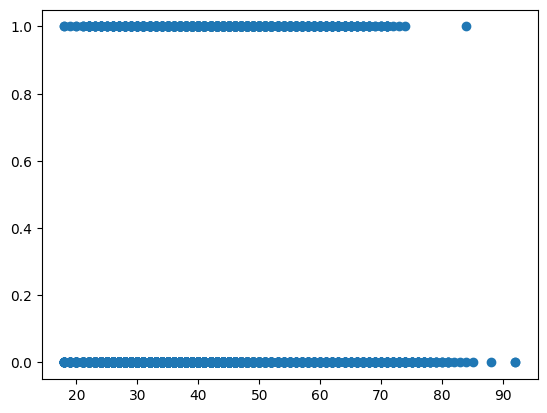

In [ ]:
(plt.scatter(data.Age,data.Exited))


In [ ]:
#next splitting the data set
#we have done already
#uisng traintest split
#80%for training and 20% for testing

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
def tuned(x_train,y_train):
  para_grid={
    'C':[0.01,0.1,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear']
    }
  model=LogisticRegression()
  grid_search=GridSearchCV(model,para_grid,cv=5,n_jobs=-1)
  grid_search.fit(x_train,y_train)
  best_model=grid_search.best_estimator_
  return best_model

best_model=tuned(x_train,y_train)
#prediction and evaluation:
def evaluate_model(model,x_test,y_test):
  predicted=model.predict(x_test)
  accuracy=accuracy_score(y_test,predicted)
  matrix=confusion_matrix(y_test,predicted)
  return accuracy,matrix
accuracy,matrix=evaluate_model(best_model,x_test,y_test)
print(f'Accruacy:{accuracy*100:.2f}%')
print(f'confusion matrix')
print(matrix)


Accruacy:81.10%
confusion matrix
[[1533   62]
 [ 316   89]]


ARTIFICIAL NEURAL NETWORK


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU
from tensorflow.keras.layers import Dropout

#sequential: why?
#sequential is creates a block inside which our neural network will be there
#sequential helps to do forward and backward propagation

#dense : it helps us to create neurons and layers(i/o and o/p and hidden layers) in our network

#relu,leaky relu are activation functions

#dropout helps to handle over fitting by deactivating few % of neuron in hidden layers


In [ ]:
classifier=Sequential()
#we have 11 input features
#one output feature
classifier.add(Dense(units=11,activation="relu"))


In [ ]:
#adding out hidden layers
classifier.add(Dense(units=8,activation="relu"))
classifier.add(Dropout(0.3))# 30% if the neurons will be deactivated
classifier.add(Dense(units=6,activation="relu"))
classifier.add(Dropout(0.2))# 30% if the neurons will be deactivate


In [ ]:
#adding output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [ ]:
#trian the neural network
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
import tensorflow as tf
#better number of epochs??
#do early stopping
#early stopping will stop when accuracy is not improving
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',     # Watch the validation loss
    patience=10,  # Stop if val_loss doesn’t improve for 10 epochs
    verbose=1, #if early stopping is trigerred a message will be displayed "early stopping"
    restore_best_weights=True # Roll back to best weights after stopping
)




In [ ]:
#classifier model
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5941 - loss: 0.7245 - val_accuracy: 0.8023 - val_loss: 0.4761
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7973 - loss: 0.4984 - val_accuracy: 0.8118 - val_loss: 0.4495
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8023 - loss: 0.4697 - val_accuracy: 0.8167 - val_loss: 0.4355
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8178 - loss: 0.4537 - val_accuracy: 0.8198 - val_loss: 0.4368
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8192 - loss: 0.4400 - val_accuracy: 0.8292 - val_loss: 0.4249
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8354 - loss: 0.4118 - val_accuracy: 0.8300 - val_loss: 0.4214
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8250 - loss: 0.4234 - val_accuracy: 0.8338 - val_loss: 0.4142
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8208 - loss: 0.4351 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

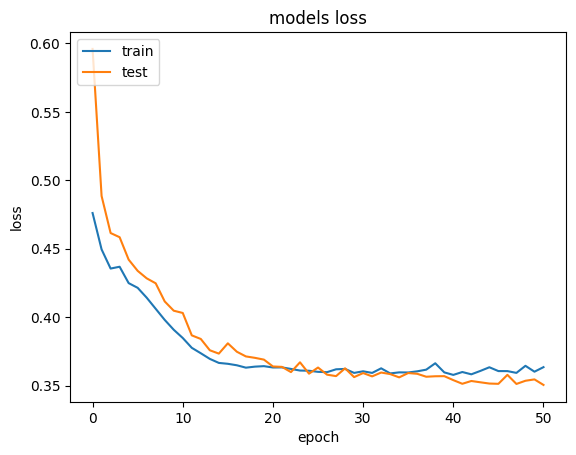

In [ ]:
#summarize the accuracy by visualization
import matplotlib.pyplot as plt
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.title("models loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#predict for test data
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1547,   48],
       [ 227,  178]])

In [ ]:
#accuracy:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(f'accuracy: {score*100:.2f}%')

accuracy: 86.25%


ENSEMBLE LEARNING~~ BAGGING

In [ ]:
#bagging techniqu

In [ ]:
#check the imbalance in the data
data.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#now letts get the output for the dataset using knn

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
y_train.value_counts()

,count
Exited,
0,6368
1,1632


In [ ]:
from imblearn.combine import SMOTETomek
smote=SMOTETomek(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts()

,count
Exited,
0,5501
1,5501


In [ ]:
#hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
def tuning(x_train,y_train):
  parameter_grid={
      'n_neighbors':range(1,21),
      'metric':["euclidean","manhattan","minkowski"],
      'weights':["uniform","distance"]
  }
  model=KNeighborsClassifier()
  grid_search=GridSearchCV(model,parameter_grid,cv=5,n_jobs=-1)
  grid_search.fit(x_train,y_train)
  return grid_search.best_estimator_

best_model=tuning(x_train,y_train)

def evaluate_model(model,x_test,y_test):
  prediction=model.predict(x_test)
  accuracy=accuracy_score(y_test,prediction)
  confusion_matric=confusion_matrix(y_test,prediction)
  return accuracy,confusion_matric

accuracy,matric=evaluate_model(best_model,x_test,y_test)
print(f'accuracy:{accuracy*100:.2f}%')
print(f'confusion metric:{matric}')


accuracy:62.60%
confusion metric:[[1112  483]
 [ 265  140]]
